In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv(r"C:\Users\bryan\Desktop\Groceries_dataset.csv")

In [3]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
len(df)

38765

In [5]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
#to process this data for Aprioi, we need to group-by Member_number, followed by Date
#this process makes it possible to view items bought together by a single member for certain dates

trans = df.groupby(['Member_number','Date'])['itemDescription'].unique().reset_index()

In [7]:
print(trans.shape)
trans.head()

(14963, 3)


,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


In [8]:
#once we group by Member-number, we need to create a list of lists of items bought together

trans_list = list(list(i) for i in trans.itemDescription.values)
trans_list

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk', 'pastry'],
 

In [34]:
#we use an encoder to encode lists into boolean values to conserve memory

encoder = TransactionEncoder().fit(trans_list)
onehot = encoder.transform(trans_list)
dfonehot = pd.DataFrame(onehot, columns=encoder.columns_)
dfonehot

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
#to use the list, we should narrow down the values given a certain support value

frequent_itemsets = apriori(dfonehot, min_support=0.002, use_colnames=True)

In [17]:
type(trans_list)

list

In [18]:
#use the apriori algorithm to create a dataframe of frequently bought items

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values(by='confidence')

In [19]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(whole milk),(ham),0.157923,0.017109,0.002740,0.017351,1.014142,3.821049e-05,1.000246
26,(other vegetables),(meat),0.122101,0.016842,0.002139,0.017515,1.039991,8.223631e-05,1.000686
16,(other vegetables),(frozen meals),0.122101,0.016775,0.002139,0.017515,1.044134,9.039652e-05,1.000754
0,(other vegetables),(berries),0.122101,0.021787,0.002673,0.021894,1.004899,1.303311e-05,1.000109
9,(rolls/buns),(chocolate),0.110005,0.023592,0.002807,0.025516,1.081592,2.117455e-04,1.001975
19,(root vegetables),(frozen vegetables),0.069572,0.028002,0.002139,0.030740,1.097751,1.904361e-04,1.002824
22,(rolls/buns),(fruit/vegetable juice),0.110005,0.034017,0.003743,0.034022,1.000136,5.091755e-07,1.000005
21,(sausage),(frozen vegetables),0.060349,0.028002,0.002072,0.034330,1.225966,3.818638e-04,1.006553
7,(pastry),(brown bread),0.051728,0.037626,0.002005,0.038760,1.030127,5.863558e-05,1.001179
14,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,5.355097e-04,1.004579


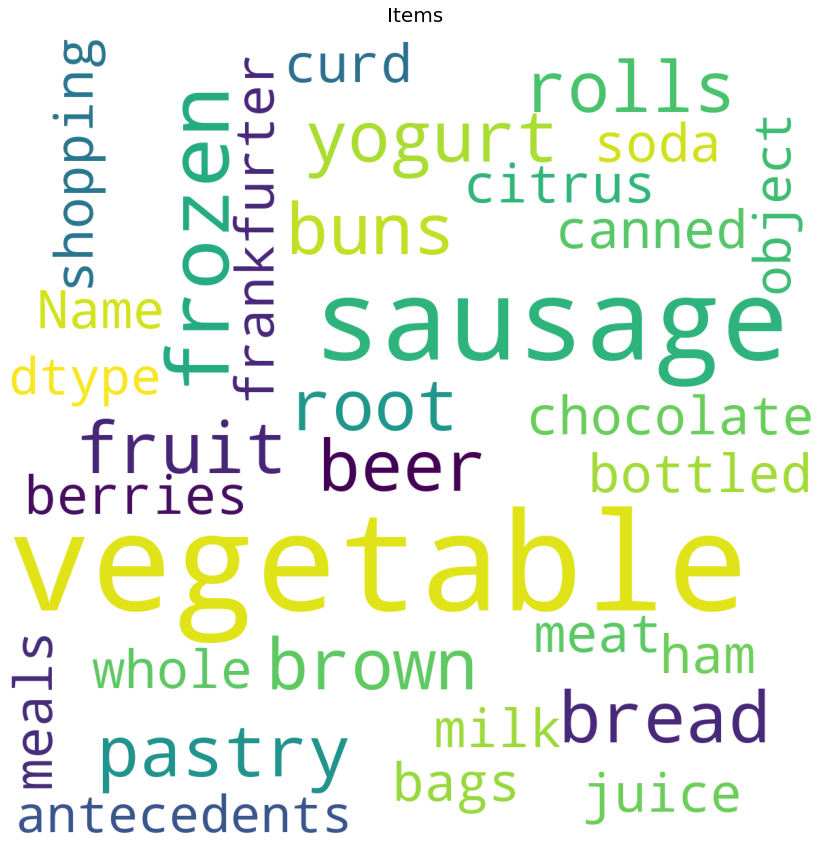

In [32]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(rules['antecedents']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

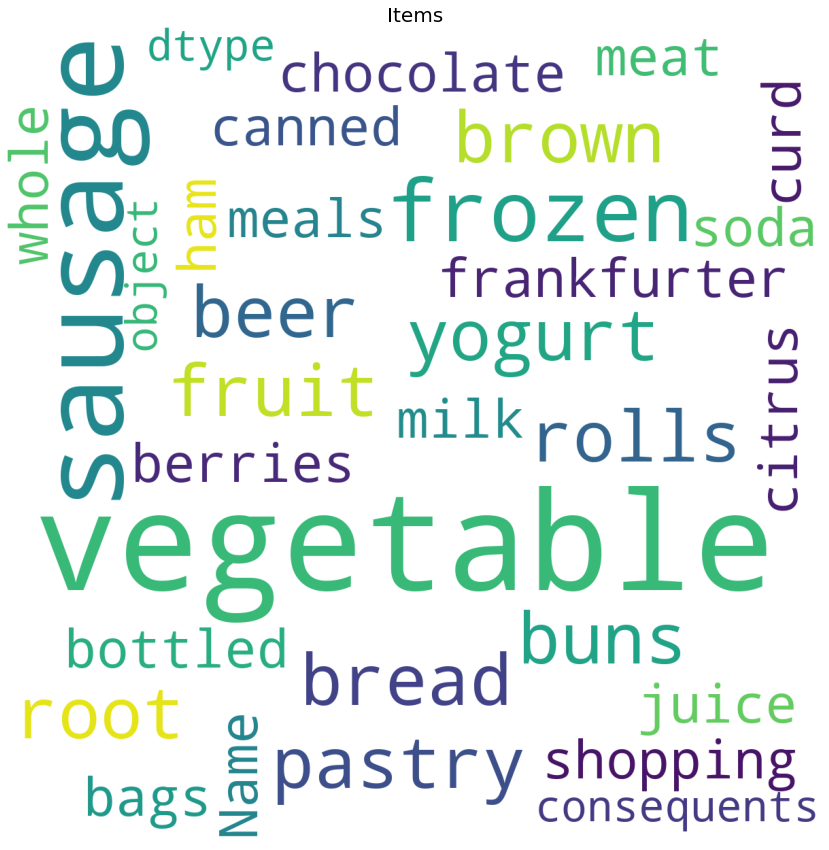

In [33]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(rules['consequents']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()